# Government Education Expense and Earnings Premium

# Introduction

The purpose of the project is to gain introdutroy understanding of the development of New Zealanders and government education expense and earnings premium with regard to education.

The notebook includes three parts. The first one is to clean all data. Because the dataset is a time series dataset so the purpose of data wrangling is basically converting all data to float type. The next part is visualisation and analysis of associated data. The last part is making a conclusion about the development of New Zealanders' Education expense and Earnings premium with regard to education.

# Data Scope and sources

The dataset prepared for this project covers social-economic data of New Zealand between 1982 to 2018. It contains 8 aspects of NZ social -economic indicators: income and wealth, poverty, health, education, safety and security, housing as well as labour. The main source of data is from various government agencies. Given there is too large a scope the dataset covers, the report mainly focuses on the education aspect and only captures some of variables about education to analyse. The following table provides definition for indicators utilized for analysis.

## Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df_indicatior = pd.read_excel('../datasets/Data_documentation.xlsx',sheet_name = "Education")
df_indicatior = df_indicatior.drop(df_indicatior.index[[0,3,4]]).loc[0:,'Indicator name':'Source']
df_indicatior.set_index('Indicator name', inplace=True)
with pd.option_context('display.max_colwidth', None):
  display(df_indicatior)

,Indicator name (alternative),Description,Source
Indicator name,,,
"Education expenditure, GDP","Education expenditure, GDP",Education expenditure as a percentage of GDP.,Education counts (Ministry of Education)
"Education expenditure, government expenses","Education expenditure, government expenses",Education expenditure as percentage of total government expenses.,Education counts (Ministry of Education)
University fees to income ratio,University fees,Average university fee as a ratio of mean weekly earnings for a full-time employee.,Education counts (Ministry of Education)
Polytechnic fees to income ratio,Polytechnic fees,Average polytechnic fee as ratio of mean weekly earnings for a full-time employee.,Education counts (Ministry of Education)
Wānanga fees to income ratio,Wānanga fees,Average wānanga fee as ratio of mean weekly earnings for a full-time employee.,Education counts (Ministry of Education)
"Degree earnings premium, hourly","Hourly earnings, degree","Median hourly earnings premium for those with a bachelors degree or higher as their highest qualification, compared to people with no qualification.",Education counts (Ministry of Education)
"Diploma/certificate earnings premium, hourly","Hourly earnings, diploma/certificate","Median hourly earnings premium for those with a diploma or certificate as their highest qualification, compared to people with no qualification.",Education counts (Ministry of Education)
"School earnings premium, hourly","Hourly earnings, school qualification","Median hourly earnings premium for those with a school qualification as their highest qualification, compared to people with no qualification.",Education counts (Ministry of Education)
"Degree earnings premium, weekly","Weekly earnings, degree","Median weekly earnings premium for those with a bachelors degree or higher as their highest qualification, compared to people with no qualification.",Education counts (Ministry of Education)


# Topic

Education is one of the most important indicators of countries competitiveness in the world. However, investment on education cost a lot for individual and government, financially and in time. Therefore, the expenditure education of the Newzealand government and individual is one of the interesting topics of the report. Besides, the difference in earnings premiums of various qualifications can reflect individual investing in further education. Another topic is the earnings premium with different education qualifications.

### Topic 1 : Expenditure in education of the New Zealand goverment and individual 

### Topic 2 : Earnings premium with different education qualifications

# Part 1: Data Wrangling

## Read datasets

The dataset is read from a CSV file into a pandas dataframe.To make columns' names interpretable, the documentation is also read from excel into a pandas dataframe.When I read datasets, I also pre-clean the dataset by add na_values argument.

In [3]:
miss_values = ['???',"nan", "-","null","NaN","NULL","NAN"]
df = pd.read_csv('../datasets/shared_prosperity_assignment_dataset_mangled.csv',na_values =  miss_values)

### Change columns' name
Because the column names of df are not easy to understand, Using the column "Indicator name' from documentation dataframe as columns for df is easier to understand.

In [4]:
#Reading every sheet from documentation.excel to seperate pandas dataframe
Sheet_names = ['Income and wealth',"Poverty","Housing","Labour","Education","Health","Safety and security","General inequality"]

In [5]:
#Concating all dataframes to one dataframe and add a extra row which represtives year column
df_documentation = pd.DataFrame()
for target in Sheet_names:
    print(target)
    target_df = pd.read_excel('../datasets/Data_documentation.xlsx',sheet_name = target)
    df_documentation = pd.concat([df_documentation,target_df],axis=0,ignore_index=True)
df_documentation.dropna(thresh = 4,inplace = True)
df_documentation.reset_index(inplace = True)
df_documentation.loc[102,:] = [np.nan,np.nan,'year',np.nan,np.nan,np.nan,np.nan]
df_documentation

Income and wealth
Poverty
Housing
Labour
Education
Health
Safety and security
General inequality


,index,Column name in dataset,Indicator name,Indicator name (alternative),Description,Source,Further information
0,0.0,Q5:Q1,Q5:Q1 income share ratio,Q5:Q1 income share,Ratio of total household income shares: fifth ...,Ministry of Social Development,Total income shares are a financial measure of...
1,1.0,D10:D1,D10:D1 income share ratio,D10:D1 income share,Ratio of total household income shares: tenth ...,Ministry of Social Development,Decile ratios of income shares are a measure s...
2,2.0,D10:D1-4(Palma),D10:D1-4 income share ratio (Palma),D10:D1-4 income share (Palma),Ratio of total household income shares: share ...,Ministry of Social Development,Gabriel Palma observed that income shares for ...
3,3.0,P90:P10_bhc,P90:P10 income ratio,P90:P10 income,"Ratio of 90th to 10th percentile incomes, befo...",Ministry of Social Development,Percentile ratios of income (as opposed to tot...
4,4.0,P80:P20_bhc,P80:P20 income ratio,P80:P20 income,"Ratio of 80th to 20th percentile incomes, befo...",Ministry of Social Development,The 80:20 measure has more stability than the ...
...,...,...,...,...,...,...,...
98,114.0,recorded_murders_and_homicides_per_million,Rate of murder and homicide,Murders and homicides,Incidence of murders and homicides per one mil...,New Zealand Police,NaN
99,115.0,regional_gdp_proportional_variation,Regional GDP variation,Regional GDP,Proportional variation in standardised measure...,Statistics New Zealand,NaN
100,116.0,difference_in_percent_for_low_income_by_gender,Regional income inadequacy variation,"Inadequacy of income, region",Proportional variation in regional survey perc...,Statistics New Zealand,NaN
101,117.0,gender_pay_gap,Gender pay gap,Gender pay gap,Gender pay gap,Statistics New Zealand,NaN


In [6]:
#Checking whether the length of dataframe from documentation after adding a year colomn is same with df
len(df_documentation['Indicator name']) == len(df.columns)

True

In [7]:
#Using the column "Indicator name' from documentation dataframe as columns for df makes the column' names are more intepretable.
df.columns = df_documentation['Indicator name']

### Set to time series dataframe

In [9]:
df['year'] =  pd.to_datetime(df['year'],format = '%Y-%m-%d')
df = df.set_index('year')

KeyError: 'year'

In [10]:
df = df.sort_index()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37 entries, 1982-12-31 to 2018-12-31
Columns: 102 entries, Q5:Q1 income share ratio to Gender pay gap
dtypes: float64(69), object(33)
memory usage: 29.8+ KB


### Convert dataframe type from object to float

The dictionary shows that columns whose type are 'O' ('Object') need to be cleaned.

In [11]:
df.dtypes.to_dict()

{'Q5:Q1 income share ratio': dtype('float64'),
 'D10:D1 income share ratio': dtype('float64'),
 'D10:D1-4 income share ratio (Palma)': dtype('float64'),
 'P90:P10 income ratio': dtype('float64'),
 'P80:P20 income ratio': dtype('float64'),
 'P80:P50 income ratio': dtype('float64'),
 'P50:P20 income ratio': dtype('float64'),
 'GINI': dtype('float64'),
 'Top 10 percent wealth share': dtype('float64'),
 'Top 5 percent wealth share': dtype('float64'),
 'Top 1 percent wealth share': dtype('float64'),
 'Lower deciles income share': dtype('float64'),
 'Middle class income share': dtype('float64'),
 'Prevalence of poverty 60% ML': dtype('float64'),
 'Prevalence of poverty 50% ML': dtype('float64'),
 'Prevalence of poverty 50% AL': dtype('float64'),
 'Prevalence of poverty 60% AL': dtype('float64'),
 'Prevalence of poverty 40% AL': dtype('float64'),
 'Prevalence of poverty, 60% ML, elderly': dtype('float64'),
 'Prevalence of poverty 50% ML, elderly': dtype('float64'),
 'Prevalence of poverty 50%

Because I pre-cleaned some data when I read the csv file,I only have 2 types data that need to be converted to float.I write 2 functions to deal with them respective.

First dirty dataset contains float and special punctuation

second one contains float and letters 

In [12]:
#df_dirty1 model:  '5.7\V' or '7.3\N\P'and '3605,5'
df_dirty1 = df.loc[:,'Tertiary education participation':'Prevalence of depression, adult']

In [13]:
def func1(x):
    if type(x) == float:
        return x
    if type(x) == int:
        return x
    if 'nan' in x:
        return np.nan
    if '\\' in x:
        return float(x.split('\\')[0])
    if ',' in x:
        return float(x.split(',')[0] + x.split(',')[1])
    
    return x

In [14]:
df_dirty1.applymap(func1)
df.loc[:,'Tertiary education participation':'Prevalence of depression, adult'] = df_dirty1.applymap(func1)

In [15]:
#df_dirty2 model:   "M14.5" or "14.5M"

In [16]:
df_dirty2 = df.loc[:,'Prevalence of depression, adult':'Prevalence of healthy weight, child']

In [17]:
def func2(x):
    return x.str.replace(r"[a-zA-Z]",'').astype(float)

In [18]:
df.loc[:,'Prevalence of depression, adult':'Prevalence of healthy weight, child'] = df_dirty2.apply(func2,axis=1)

# Part 2 : Data Analysis and Visualization

The data about education can be split into two parts: Education expense and Earning premieu with regard to education.

Due to there are a lot of missing value before 2000 of indicators of Education expense, data about education expense after 2000 is selected and named df_expense_after2000 

Due to there are a lot of missing value before 2006 of indicators of Earning premieu with regard to eduction, data about Earning premieu with regard to eduction after 2006 is selected and named df_earning_after2006  

### Topic 1 : Expensiture of education the Newzealand goverment and individual have costed

In [19]:
df.loc[:,'Tertiary education participation':'School earnings premium, weekly']

Indicator name,Tertiary education participation,"Education expenditure, GDP","Education expenditure, government expenses",Tertiary loan as a percentage of income,Tertiary loan leaving balance as a percentage of income,University fees to income ratio,Polytechnic fees to income ratio,Wānanga fees to income ratio,"Degree earnings premium, hourly","Diploma/certificate earnings premium, hourly","School earnings premium, hourly","Degree earnings premium, weekly","Diploma/certificate earnings premium, weekly","School earnings premium, weekly"
year,,,,,,,,,,,,,,
1982-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_expense_after2000 = df.loc['2000':'2016','Tertiary education participation':'Wānanga fees to income ratio']
df_expense_after2000

Indicator name,Tertiary education participation,"Education expenditure, GDP","Education expenditure, government expenses",Tertiary loan as a percentage of income,Tertiary loan leaving balance as a percentage of income,University fees to income ratio,Polytechnic fees to income ratio,Wānanga fees to income ratio
year,,,,,,,,
2000-12-31,10.1,5.0,16.4,25.683034,39.931219,5.559656,5.368578,3.859014
2001-12-31,11.0,5.1,16.8,25.973964,39.081657,5.551530,4.960433,1.794410
2002-12-31,11.9,5.0,17.3,24.719118,37.985612,5.235649,4.400569,0.885316
2003-12-31,12.5,5.2,17.6,24.090065,39.285130,4.984462,3.370603,0.478174
2004-12-31,13.1,5.2,18.1,23.500867,37.456672,5.143210,3.051086,0.541078
2005-12-31,13.5,5.1,17.7,23.291860,38.681048,5.134079,3.075128,0.600699
2006-12-31,13.3,6.1,20.1,23.578150,36.555916,5.160616,3.331012,0.574603
2007-12-31,13.1,5.4,17.2,23.963736,36.080369,5.204035,3.487518,0.600719
2008-12-31,12.4,5.1,16.8,24.174053,36.361805,5.275847,3.652069,0.467032


In [21]:
df_earning_after2006 = df.loc['2006':'2016','Degree earnings premium, hourly':'School earnings premium, weekly']
df_earning_after2006

Indicator name,"Degree earnings premium, hourly","Diploma/certificate earnings premium, hourly","School earnings premium, hourly","Degree earnings premium, weekly","Diploma/certificate earnings premium, weekly","School earnings premium, weekly"
year,,,,,,
2006-12-31,64.285714,33.928571,7.142857,152.733119,92.926045,9.003215
2007-12-31,63.421419,37.691238,7.440890,159.615385,105.128205,7.692308
2008-12-31,67.344262,32.065574,4.786885,151.190476,92.261905,3.571429
2009-12-31,62.500000,25.875000,6.250000,135.866261,103.951368,11.246201
2010-12-31,63.788820,28.074534,5.590062,146.951220,104.268293,4.573171
2011-12-31,60.905840,25.148987,4.290822,146.407186,98.203593,9.281437
2012-12-31,59.096110,20.137300,1.716247,143.352601,92.485549,0.289017
2013-12-31,59.833333,29.166667,3.500000,162.393162,94.017094,9.971510
2014-12-31,66.666667,31.111111,2.777778,161.432507,110.743802,5.785124


(0.0, 21.0)

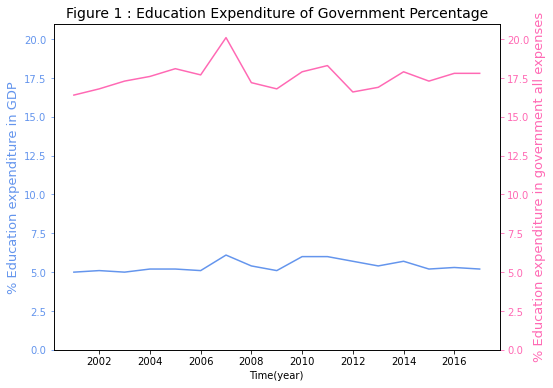

In [22]:
fig,ax = plt.subplots(figsize = (8,6))
ax.plot(df_expense_after2000.index,df_expense_after2000['Education expenditure, GDP'],color = 'cornflowerblue')
ax.set_xlabel('Time(year)')
ax.set_ylabel('% Education expenditure in GDP',color = 'cornflowerblue',size = 13 )
ax.tick_params('y',colors = 'cornflowerblue')
ax.set_title('Figure 1 : Education Expenditure of Government Percentage',size = 14)
ax.set_ylim([0,21])

ax2 = ax.twinx()
ax2.plot(df_expense_after2000.index,df_expense_after2000['Education expenditure, government expenses'],color = 'hotpink')
ax2.set_xlabel('Time(year)')
ax2.set_ylabel('% Education expenditure in government all expenses',color = 'hotpink',size = 13)
ax2.tick_params('y',colors = 'hotpink')
ax2.set_ylim([0,21])

The figure above shows that the entire trend of education expenditure in GDP is slightly similar to education expenditure in government expenses. Expenditure on education as a percentage of GDP remained relatively stable at around 5% of GDP between 2000 and 2016. The percentage of Education expenditure in government expenses steady fluctuated around 17.5%

The level of the public expenditure in education provides a measure of the government's commitment to education.
The government's commitment to education is always quite firm as a conclusion of above figure.

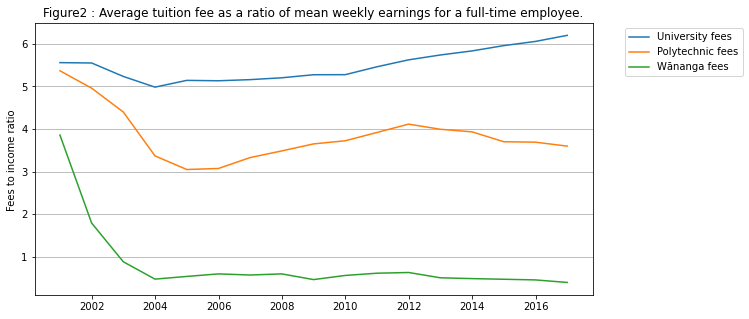

In [23]:
fig,ax = plt.subplots(figsize = (10,5))
ax.plot(df_expense_after2000.index,df_expense_after2000.loc[:,['University fees to income ratio','Polytechnic fees to income ratio','Wānanga fees to income ratio']])
ax.set_title('Figure2 : Average tuition fee as a ratio of mean weekly earnings for a full-time employee.',size = 12)
ax.set_ylabel('Fees to income ratio ')
ax.yaxis.grid(True)
ax.legend(['University fees','Polytechnic fees','Wānanga fees'],prop={'size': 10},bbox_to_anchor=(1.05, 1))

Figure 2 presents the ratio of average tuition fees per student to the average weekly income for
employed persons.

In the universities, the ratio of average tuition fees to the average weekly income has
increased from 5  in 2004 to 6.2 in 2016 as a result of tuition fees rising faster than income. 

In Wānanga, the tuition fees and income raised at quite the same rate after 2003.

### Topic 2 : Earnings premium with different education qualifications

The earnings premium is the additional earnings received by people with a tertiary education qualification as a percentage of the income or earnings of those who have no qualification.
Earnings premiums are expressed as the difference in what one group with qualification earns compared with the group that has no qualification.


Text(0, 0.5, 'Median hourly earnings premium %')

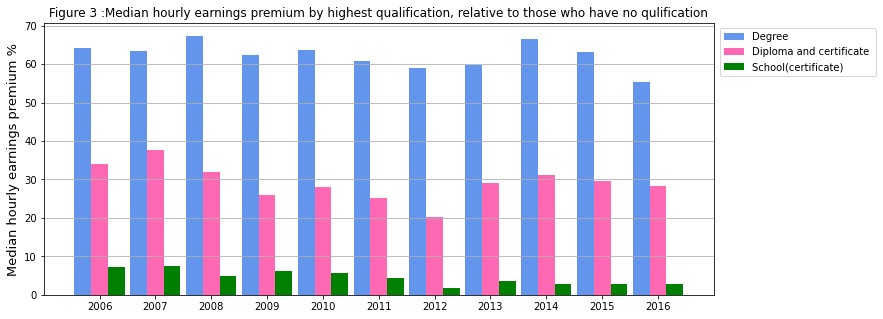

In [24]:
fig, ax = plt.subplots(figsize=(12, 5))
width = 0.3 # bar width
xlocs = np.arange(11) 
ax.bar(xlocs-width,df_earning_after2006['Degree earnings premium, hourly'], width, color='cornflowerblue', label='Degree')
ax.bar(xlocs,df_earning_after2006['Diploma/certificate earnings premium, hourly'], width, color='hotpink', label='Diploma and certificate ')
ax.bar(xlocs+width,df_earning_after2006['School earnings premium, hourly'], width, color='green', label='School(certificate) ')
ax.set_xticks(ticks=range(11))
ax.set_xticklabels(df_earning_after2006.index.year)
ax.set_title('Figure 3 :Median hourly earnings premium by highest qualification, relative to those who have no qulification')
plt.legend(prop={'size': 10},bbox_to_anchor=(1.25, 1))
ax.yaxis.grid(True)
ax.set_ylabel('Median hourly earnings premium %',size = 13)

The hourly earnings premium of those with a degree compared to people with no qualification has consistently been above 60% except in 2012(59%) and 2016(55%). The lowest advantage of median hourly earnings premium for those with a tertiary certificate or diploma was still above 20%. However, the hourly earnings premium of those with school, on average, received less 7%  earnings than someone without any qualification.

The trend of earnings premium has been decreasing since 2014, which partly reflects that the labour market has paid attention to people who have no qualification. However, people with higher qualification do earn more money than people with lower qualification or without any qualification.

Text(0, 0.5, 'Median weekly earnings premium %')

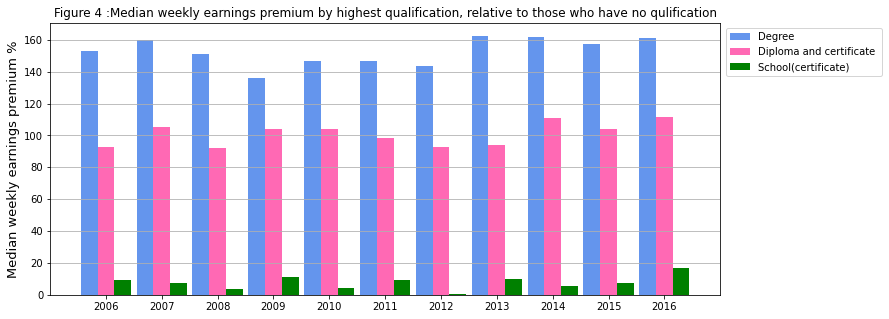

In [25]:
fig, ax = plt.subplots(figsize=(12, 5))
width = 0.3 # bar width
xlocs = np.arange(11) 
ax.bar(xlocs-width,df_earning_after2006['Degree earnings premium, weekly'], width, color='cornflowerblue', label='Degree')
ax.bar(xlocs,df_earning_after2006['Diploma/certificate earnings premium, weekly'], width, color='hotpink', label='Diploma and certificate ')
ax.bar(xlocs+width,df_earning_after2006['School earnings premium, weekly'], width, color='green', label='School(certificate) ')
ax.set_xticks(ticks=range(11))
ax.set_xticklabels(df_earning_after2006.index.year)
ax.set_title('Figure 4 :Median weekly earnings premium by highest qualification, relative to those who have no qulification')
plt.legend(prop={'size': 10},bbox_to_anchor=(1.25, 1))
ax.yaxis.grid(True)
ax.set_ylabel('Median weekly earnings premium %',size = 13)

The weekly earnings premium of those with a degree compared to people with no qualification has averagely reached 150%.  The median weekly earnings premiums for those with a tertiary certificate or diploma were around 100%.

As Figure 4 further demonstrates, the gap of earnings premiums for having a tertiary qualification became larger and larger when the Median weekly earnings premium was selected as the index. The reasons causing difference between weekly earnings and hourly earnings may be various.For example, working hours per week may be one of reasons.

# Part 3 : Conclusion

The application of data visualization on education indicators was successful in producing some interesting insights.

For expenditure education of NZ government and individual , the government's confidence in education investment has always  been quite firm and individual cost has been more and more expensive with the increase of qualification level and it may continue to increase. 

In the aspect of earnings premium with different educational qualifications, the analysis clearly distinguished the huge gap between earning premium of higher qualification and lower or no qualification.

The topic of analysing education indicator is a very broad topic. Due to the limitation of the data source, only a few indicators have been analysed. For example, because the minimum wage partly depends on people with lower qualification or no qualification, the indicator of minimum wage can be added into to analysis of earning premium so the relationship of minimum wage and changes in the earning premium can be analysed.